# Education Lead Conversion Model

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

A typical lead conversion process can be represented using the following funnel:

![Lead Conversion Funnel](../input/Lead%20Conversion%20Process.jpg)

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

The goal of this project is to build a model that assigns a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data

A leads dataset from the past with around 9000 data points is provided. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. Check out for all the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Goal of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot and is more likely to be converted while a lower score would mean that the lead is cold.

## Data Exploration

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("../input/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
columns = data.columns
columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

A first step should always be to undertsand the features of the dataset. In our case, we have the following features.

### Target Variable

           Count  Percentage
Converted                   
0           5679   61.461039
1           3561   38.538961


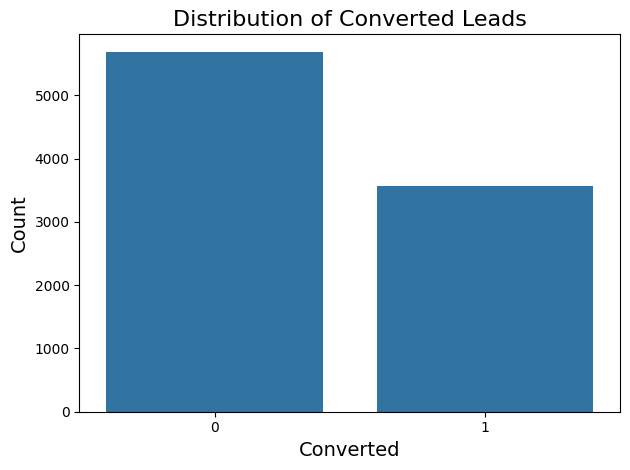

In [8]:
# check the target variable distribution
target_distribution = pd.DataFrame({
    'Count': data['Converted'].value_counts(),
    'Percentage': data['Converted'].value_counts(normalize=True) * 100
})

print(target_distribution)

# Plot without hue to avoid redundancy
sns.countplot(x=data['Converted'])

# Adding a title and axis labels for better understanding
plt.title('Distribution of Converted Leads', fontsize=16)
plt.xlabel('Converted', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Improve layout
plt.tight_layout()

# Display the plot
plt.savefig('figures/converted_distribution.png', dpi=300)
plt.show()

**Inference about the Target Variable:**

- The conversion rate is about 38.54%, meaning that a little over one-third of the leads turn into paying customers. 
- There is a moderate class imbalance, with about 61.46% of the leads not converting.
- A significate portion of the leads are not converting. Our goal is to identify the factors that differentiate the converted leads from the non-converted leads. Understanding these factors can help X Education refine their generation and nurturing strategies to improve the conversion rate.

### Features

In [9]:
print(data['Newspaper Article'].unique())
print(data['Newspaper Article'].nunique())

['No' 'Yes']
2


#### Binary Features

In [10]:
# Identify columsn with exactly two unique values, "Yes" and "No"
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {'Yes', 'No'}]
binary_columns

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [11]:
# Value counts for binary columns
for col in binary_columns:
    print(data[col].value_counts())
    print()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

Search
No     9226
Yes      14
Name: count, dtype: int64

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64



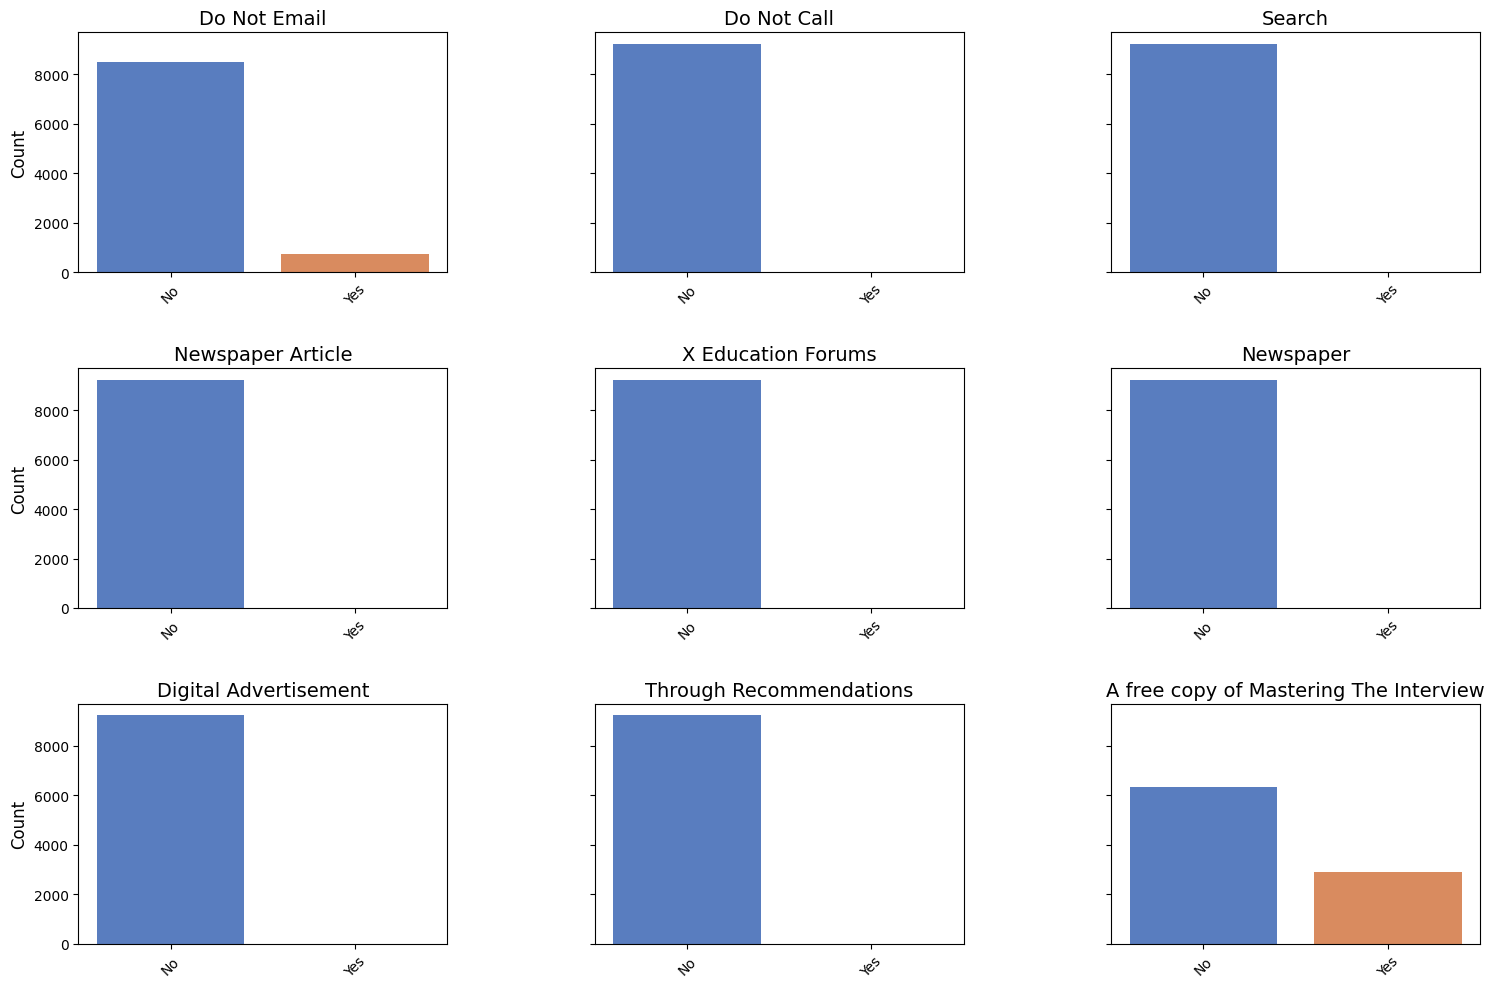

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of binary columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, col in enumerate(binary_columns):
    sns.countplot(x=data[col], ax=axes[i], palette='muted', hue=data[col], legend=False)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')  # Remove x-axis label
    axes[i].set_ylabel('Count', fontsize=12)  # Set y-axis label
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels if needed

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Save the figure in high resolution
plt.savefig('figures/binary_columns_distribution.png', dpi=300)

plt.show()

**Inference about Binary Features:**

All the binary features except "Do Not Email" and "A free copy of Mastering The Interview" are highly imbalanced. We will have to handle them before building the model as they might not contribute meaningfully to the prediction and could potentially harm the model performance.

#### Single Value Features

While checking the binary features, we can see that the following features have only one value. These features will not be useful for our analysis as they do not provide any information.

In [13]:
single_value_columns = [col for col in data.columns if data[col].dropna().nunique() == 1]
single_value_columns

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [14]:
for col in single_value_columns:
    print(data[col].value_counts())
    print()

Magazine
No    9240
Name: count, dtype: int64

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

Get updates on DM Content
No    9240
Name: count, dtype: int64

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64



The presence of these single value features suggests that they offer no meaningful information to the model and can be dropped. However, it's also good idea to understand why these columns are constant to ensure there isn't a deeper issue with the data or to gain insights into the buisness process that generated the data.

#### Categorical Features

##### Lead Origin

                         Count  Percentage
Lead Origin                               
Landing Page Submission   4886   52.878788
API                       3580   38.744589
Lead Add Form              718    7.770563
Lead Import                 55    0.595238
Quick Add Form               1    0.010823


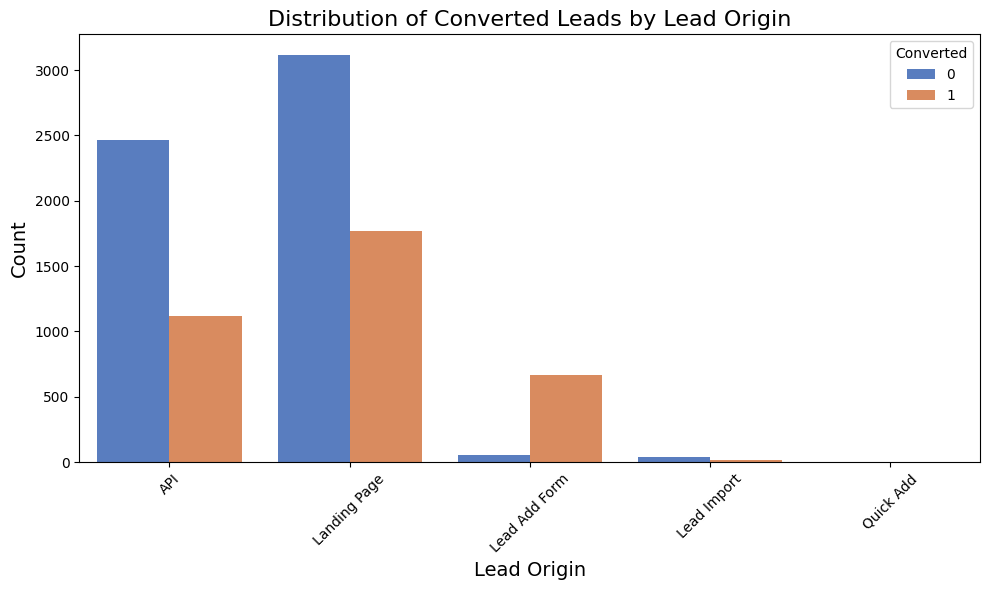

In [15]:
lead_origin_distribution = pd.DataFrame({
    'Count': data['Lead Origin'].value_counts(),
    'Percentage': data['Lead Origin'].value_counts(normalize=True) * 100
})

print(lead_origin_distribution)

# Map original labels to shorter versions for plotting
label_mapping = {
    'Landing Page Submission': 'Landing Page',
    'API': 'API',
    'Lead Add Form': 'Lead Add Form',
    'Lead Import': 'Lead Import',
    'Quick Add Form': 'Quick Add'
}

# Plot with custom labels
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Lead Origin'].map(label_mapping), palette='muted', hue=data['Converted'])
plt.title('Distribution of Converted Leads by Lead Origin', fontsize=16)
plt.xlabel('Lead Origin', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/converted_leads_by_lead_origin.png', dpi=300)
plt.show()

- The distribution of leads by origin shows that `Landing Page Submission` and `API` are the primary sources of leads, both in terms of volume and conversions.
- The `Lead Add Form`, though contributing fewer leads, has a higher conversion rate. This suggests that the leads generated through the `Lead Add Form` are of higher quality and are more likely to convert.
- `Lead Import` and `Quick Add Form` have minimal impact, suggesting these channels may nto be as effective or are not a focus in current lead generation strategy.

In [16]:
categorical_features = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']

In [17]:
def plot_print_distribution(data, feature, target, palette='muted', save_path='figures'):

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature], palette=palette, hue=data[target])
    plt.title(f'Distribution of {feature} by {target}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot if a path is provided
    if save_path:
        plt.savefig(f'{save_path}/{feature}_distribution.png', dpi=300)

    plt.show()

    distribution = pd.DataFrame({
        'Total Count': data[feature].value_counts(),
        'Total Percentage': data[feature].value_counts(normalize=True) * 100,
        'Converted Count': data[data[target] == 1][feature].value_counts(),
        'Converted Percentage': data[data[target] == 1][feature].value_counts(normalize=True) * 100,
        'Conversion Rate (%)': (data[data[target] == 1][feature].value_counts() / data[feature].value_counts()) * 100
    })


    # Fill missing values with 0 (in case a category doesn't appear in one of the subgroups)
    distribution = distribution.fillna(0)

    # Sort the DataFrame by 'Total Count' in descending order
    distribution = distribution.sort_values(by='Total Count', ascending=False).head(7).round(2)
    
    # Print the distribution
    display(distribution)

##### Lead Source

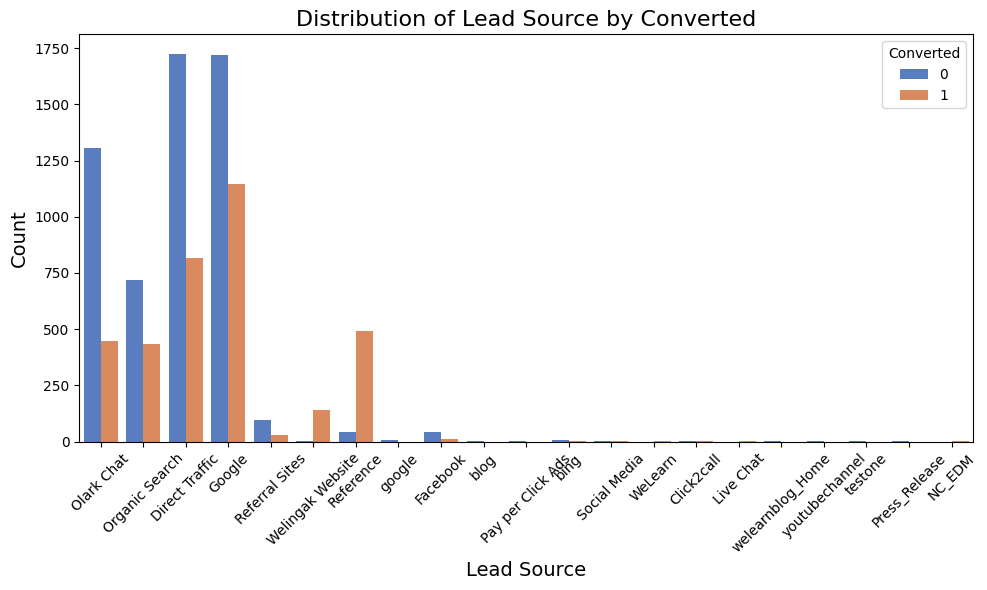

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Lead Source,,,,,
Google,2868,31.16,1147.0,32.47,39.99
Direct Traffic,2543,27.63,818.0,23.16,32.17
Olark Chat,1755,19.07,448.0,12.68,25.53
Organic Search,1154,12.54,436.0,12.34,37.78
Reference,534,5.80,490.0,13.87,91.76
Welingak Website,142,1.54,140.0,3.96,98.59
Referral Sites,125,1.36,31.0,0.88,24.80


In [18]:
plot_print_distribution(data=data, feature='Lead Source', target='Converted')

- The `Lead Source` distribution provides clear insights into which channels are driving most traffic and conversions. *Google, Direct Traffic, and Olark* are key sources that should be prioritized, while low-performing channels might require reevaluation or realignment of resources.
- The count of leads from `Reference` and `Welingak Website` is low, but the conversion rate is high. This suggests that these sources are highly effective in generating quality leads. The company should consider investing more resources in these channels to increase the volume of leads.

##### Last Activity

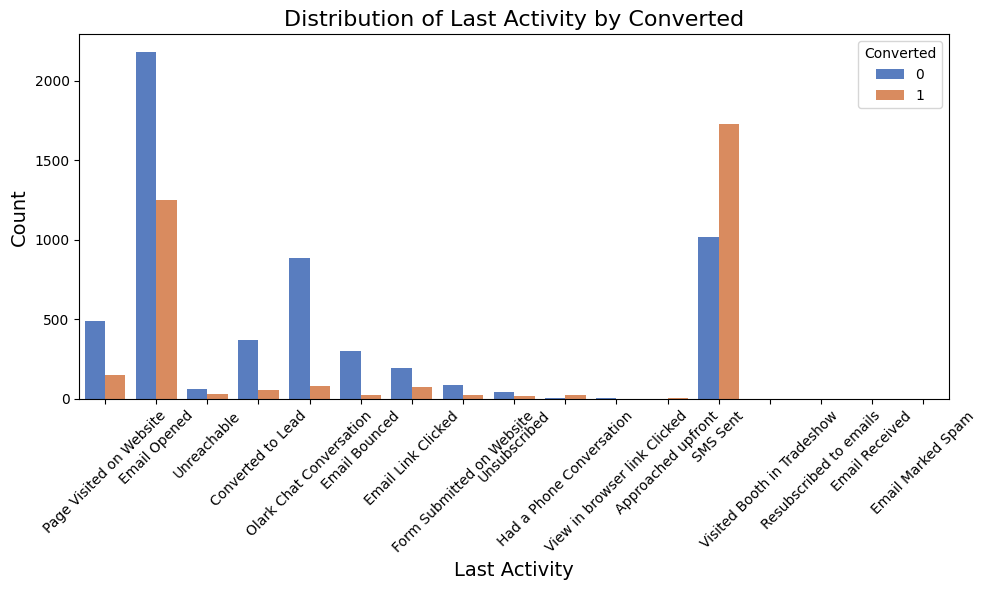

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Last Activity,,,,,
Email Opened,3437,37.62,1253.0,36.01,36.46
SMS Sent,2745,30.04,1727.0,49.63,62.91
Olark Chat Conversation,973,10.65,84.0,2.41,8.63
Page Visited on Website,640,7.00,151.0,4.34,23.59
Converted to Lead,428,4.68,54.0,1.55,12.62
Email Bounced,326,3.57,26.0,0.75,7.98
Email Link Clicked,267,2.92,73.0,2.10,27.34


In [19]:
plot_print_distribution(data=data, feature='Last Activity', target='Converted')

- From the `Last Activity` distribution, we can see that most leads have their last activity as `Email Opened`, `SMS Sent`, or `Olark Chat Conversation`. These activities are likely to be the most effective in engaging leads and driving conversions.
- Among them `SMS Sent` has the highest conversion rate, suggesting that it is a highly effective channel for engaging leads. This insight can be used to prioritize resources and efforts on the most effective channels.

##### Country

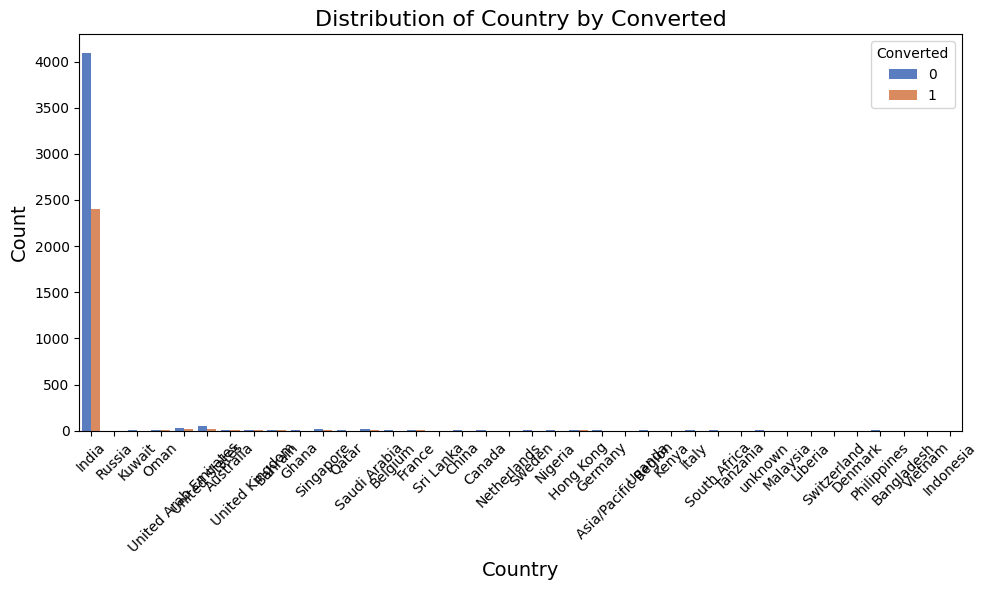

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Country,,,,,
India,6492,95.77,2401.0,96.62,36.98
United States,69,1.02,18.0,0.72,26.09
United Arab Emirates,53,0.78,20.0,0.80,37.74
Singapore,24,0.35,11.0,0.44,45.83
Saudi Arabia,21,0.31,4.0,0.16,19.05
United Kingdom,15,0.22,5.0,0.20,33.33
Australia,13,0.19,3.0,0.12,23.08


In [20]:
plot_print_distribution(data=data, feature='Country', target='Converted')

- India overwhelmingly dominates the `Country` distribution, with over 95% of the leads originating from India. This suggests that the company's marketing efforts are primarily focused on the Indian market. 
- `United States` and `United Arab Emirates` are the only other countries with a significant number of leads. These countries could be potential areas for expansion or targeted marketing efforts.

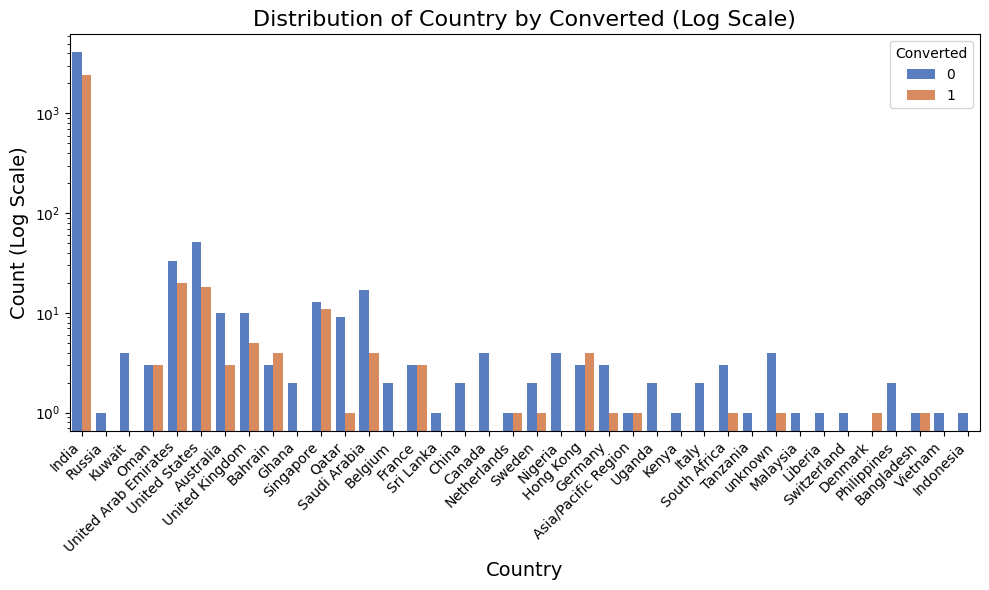

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and `feature` is the column you want to plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Converted', data=data, palette='muted')

# Set the y-axis to log scale
plt.yscale('log')

# Add title and labels
plt.title('Distribution of Country by Converted (Log Scale)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count (Log Scale)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save or show the plot
plt.show()

##### Specialization

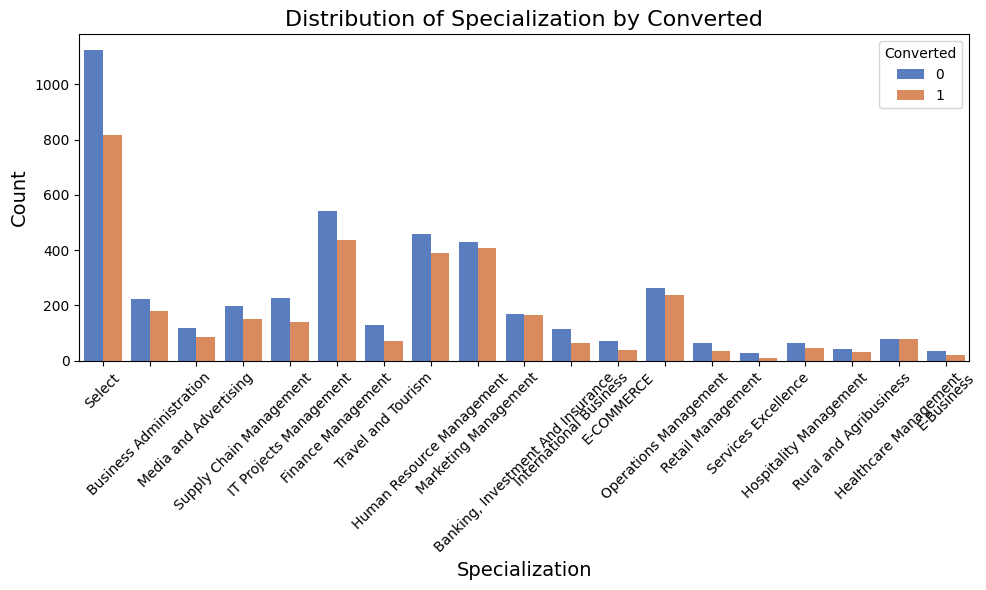

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Specialization,,,,,
Select,1942,24.89,818,23.99,42.12
Finance Management,976,12.51,436,12.79,44.67
Human Resource Management,848,10.87,388,11.38,45.75
Marketing Management,838,10.74,408,11.96,48.69
Operations Management,503,6.45,238,6.98,47.32
Business Administration,403,5.17,179,5.25,44.42
IT Projects Management,366,4.69,140,4.11,38.25


In [22]:
plot_print_distribution(data=data, feature='Specialization', target='Converted')

- The distribution of `Specialization` shows that most leads have not specified a specialization. 
- `Finance Management`, `Human Resource Management` and `Marketing Management` are the most popular specializations among those that have been specified. Majority of the leads are coming from the people of these specializations. This suggests that they are key areas of interest for the target audience and efforts should be concentrated on these fields.

##### How did you hear about X Education

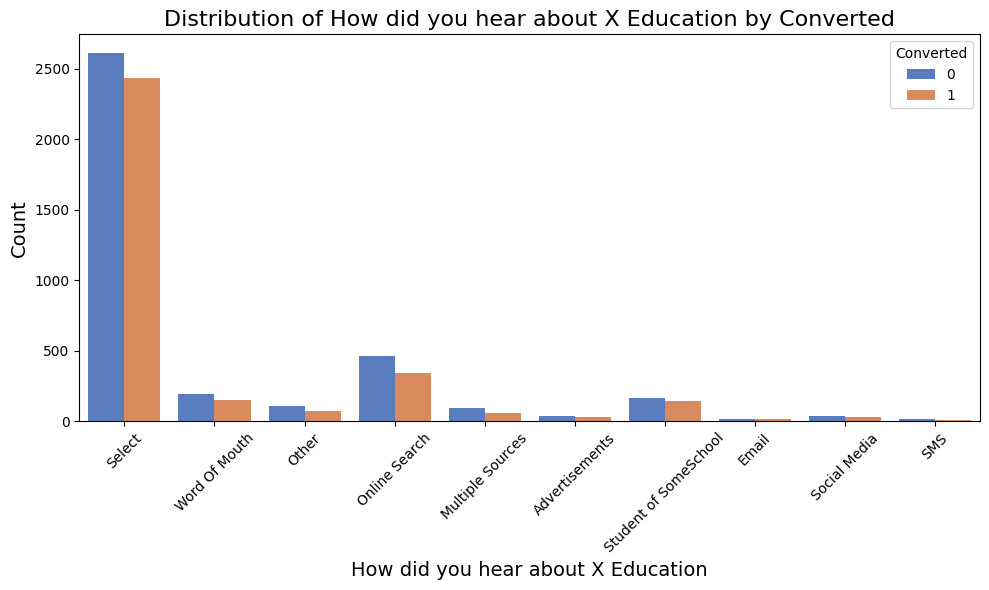

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
How did you hear about X Education,,,,,
Select,5043,71.70,2431,74.16,48.21
Online Search,808,11.49,343,10.46,42.45
Word Of Mouth,348,4.95,152,4.64,43.68
Student of SomeSchool,310,4.41,143,4.36,46.13
Other,186,2.64,75,2.29,40.32
Multiple Sources,152,2.16,56,1.71,36.84
Advertisements,70,1.00,32,0.98,45.71


In [23]:
plot_print_distribution(data=data, feature='How did you hear about X Education', target='Converted')

- The distribution of `How did you hear about X Education` shows that most leads have not specified how they heard about X Education. 
- Not many leads are coming from `Advertisements` and `Social Media`, suggesting a need of focus on optimizing these channels to better utilize them for lead generation.

##### What is your current occupation

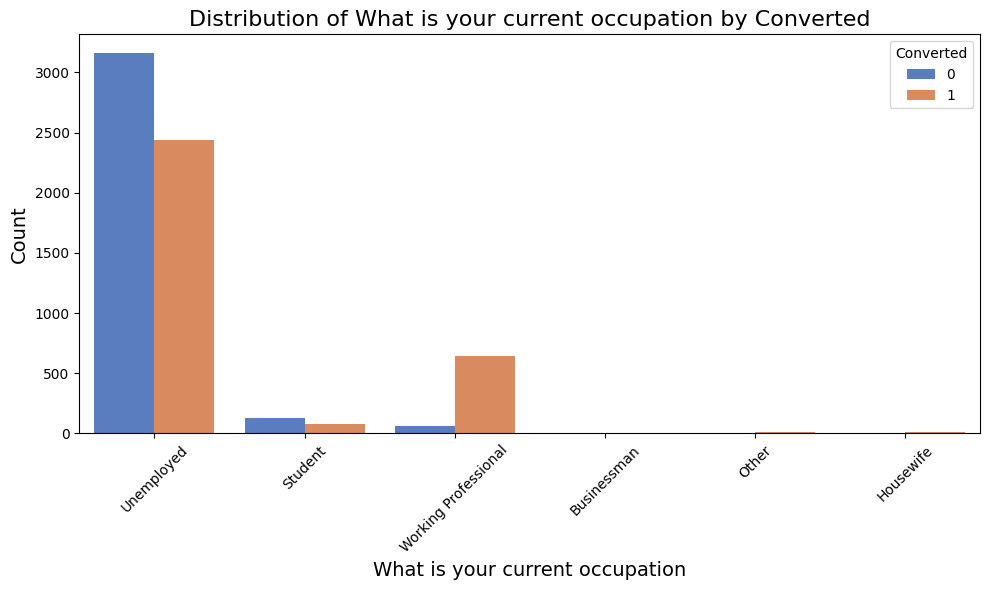

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
What is your current occupation,,,,,
Unemployed,5600,85.50,2441,76.50,43.59
Working Professional,706,10.78,647,20.28,91.64
Student,210,3.21,78,2.44,37.14
Other,16,0.24,10,0.31,62.50
Housewife,10,0.15,10,0.31,100.00
Businessman,8,0.12,5,0.16,62.50


In [24]:
plot_print_distribution(data=data, feature='What is your current occupation', target='Converted')

- The majority of leads are coming from `Unemployed` individuals, followed by `Working Professionals`. This suggests that the courses offered by X Education are appealing to individuals looking to upskill or change careers.
- The conversion rate is highest for `Working Professionals`, indicating that they are more likely to convert compared to other occupation categories. Special focus should be given to generate more leads from this category.
- `Housewives` have a very good conversion rate but the leads count is very low. So this might be outliers.

##### What matters most to you in choosing a course

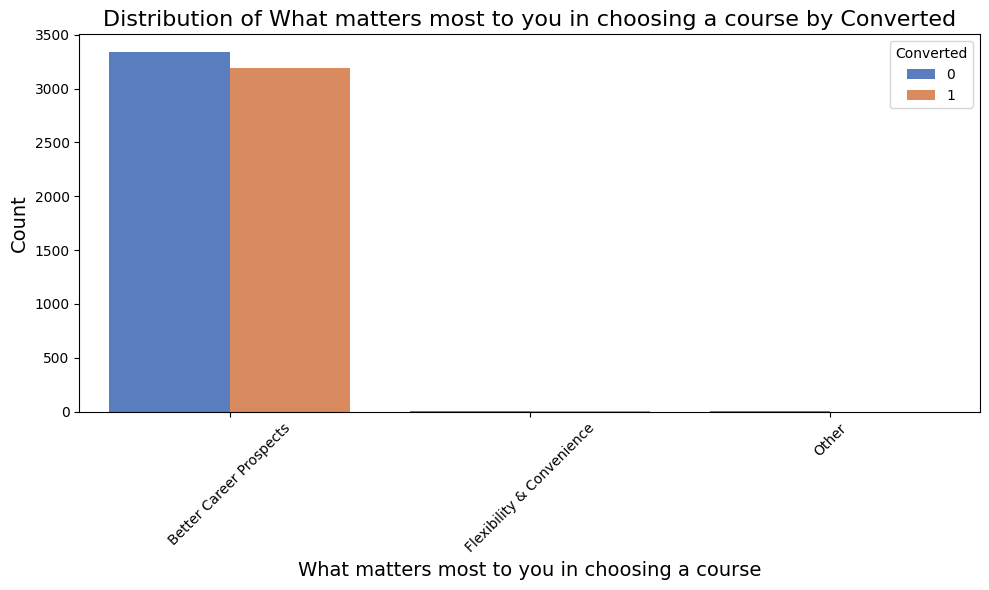

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
What matters most to you in choosing a course,,,,,
Better Career Prospects,6528,99.95,3190.0,99.97,48.87
Flexibility & Convenience,2,0.03,1.0,0.03,50.00
Other,1,0.02,0.0,0.00,0.00


In [25]:
plot_print_distribution(data=data, feature='What matters most to you in choosing a course', target='Converted')

For majority of the leads, `Better Career Prospects` is the most important factor in choosing a course. This suggests that the target audience is primarily interested in courses that can help them advance their careers. The company should focus on marketing the courses in a way that highlights the career benefits and opportunities they offer.

##### Tags

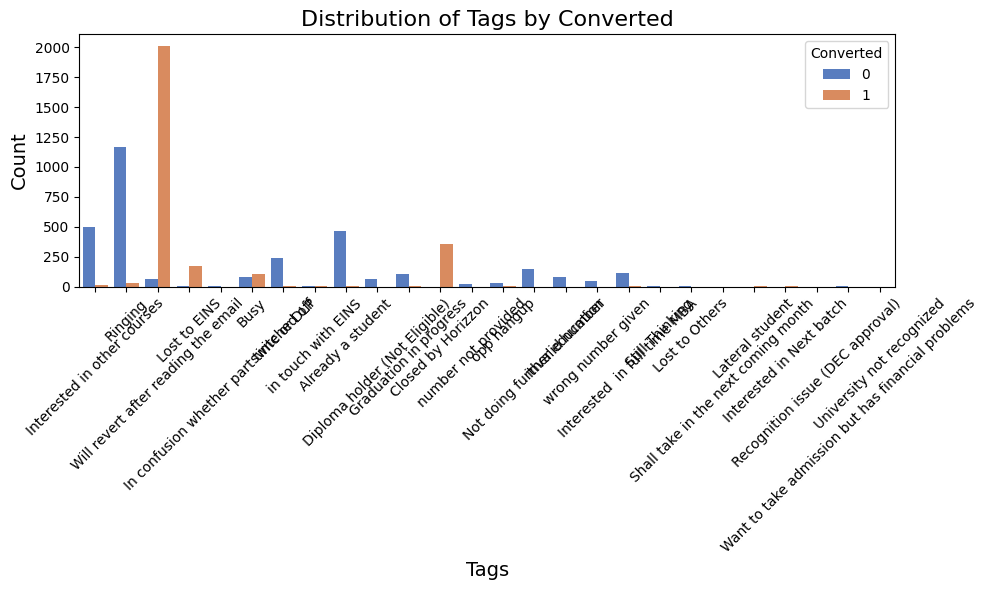

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Tags,,,,,
Will revert after reading the email,2072,35.20,2007.0,73.65,96.86
Ringing,1203,20.43,34.0,1.25,2.83
Interested in other courses,513,8.71,13.0,0.48,2.53
Already a student,465,7.90,3.0,0.11,0.65
Closed by Horizzon,358,6.08,356.0,13.06,99.44
switched off,240,4.08,4.0,0.15,1.67
Busy,186,3.16,105.0,3.85,56.45


In [26]:
plot_print_distribution(data=data, feature='Tags', target='Converted')

- **High Conversion Potential**: Leads tagged as `Will revert after reading the email` show a very high conversion rate of **96.86%**. These leads are likely to convert, indicating that follow-up processes for these leads are effective. This group should be prioritized for immediate and focused attention.

- **Effective External Handling**: The `Closed by Horizzon` tag also has an exceptionally high conversion rate of **99.44%**, suggesting that external agencies are highly effective in converting these leads. Continued collaboration or even expanding work with these agencies could be beneficial.

- **Moderate but Promising**: The `Busy` tag, with a **56.45%** conversion rate, indicates that these leads are worth following up despite initial challenges in communication. Special attention and perhaps more flexible communication strategies might increase conversion.

- **Low Conversion Attention**: Conversely, tags like `Ringing` (**2.83%** conversion rate) and `Interested in other courses` (**2.53%** conversion rate) suggest that these leads are less likely to convert. These may require a different approach or might not be worth as much focus compared to higher-converting tags.

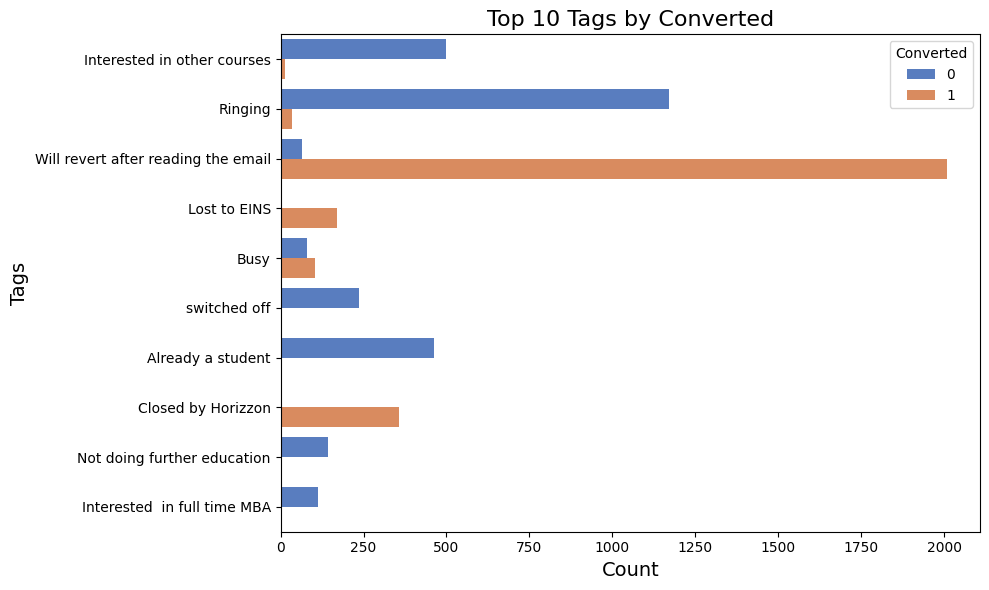

In [27]:
top_tags = data['Tags'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.countplot(y='Tags', hue='Converted', data=data[data['Tags'].isin(top_tags)], palette='muted')
plt.title('Top 10 Tags by Converted', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Tags', fontsize=14)
plt.tight_layout()
plt.show()

- Majority of the leads have been tagged as `Will revert after reading the email`, and it has the highest conversion rate. This suggests that leads that have been tagged in this way are more likely to convert.

##### Lead Quality

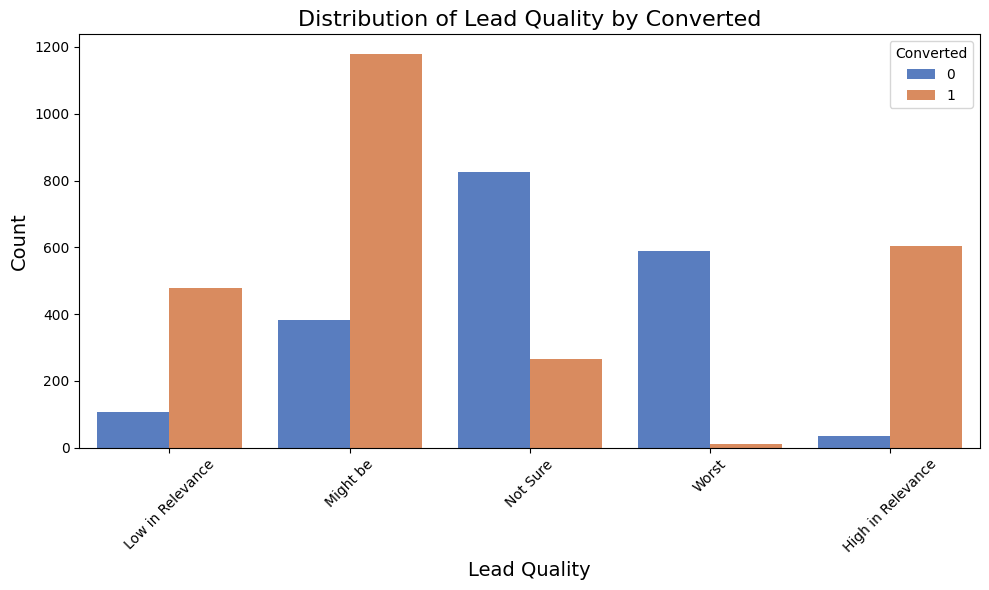

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Lead Quality,,,,,
Might be,1560,34.88,1179,46.47,75.58
Not Sure,1092,24.41,266,10.48,24.36
High in Relevance,637,14.24,603,23.77,94.66
Worst,601,13.44,12,0.47,2.00
Low in Relevance,583,13.03,477,18.80,81.82


In [28]:
plot_print_distribution(data=data, feature='Lead Quality', target='Converted')

- This distribution shows that intuition of the employess is usually correct. The leads that are tagged as `Might be` or `High in Relevance` have a higher conversion rate compared to other tags.

##### Lead Profile

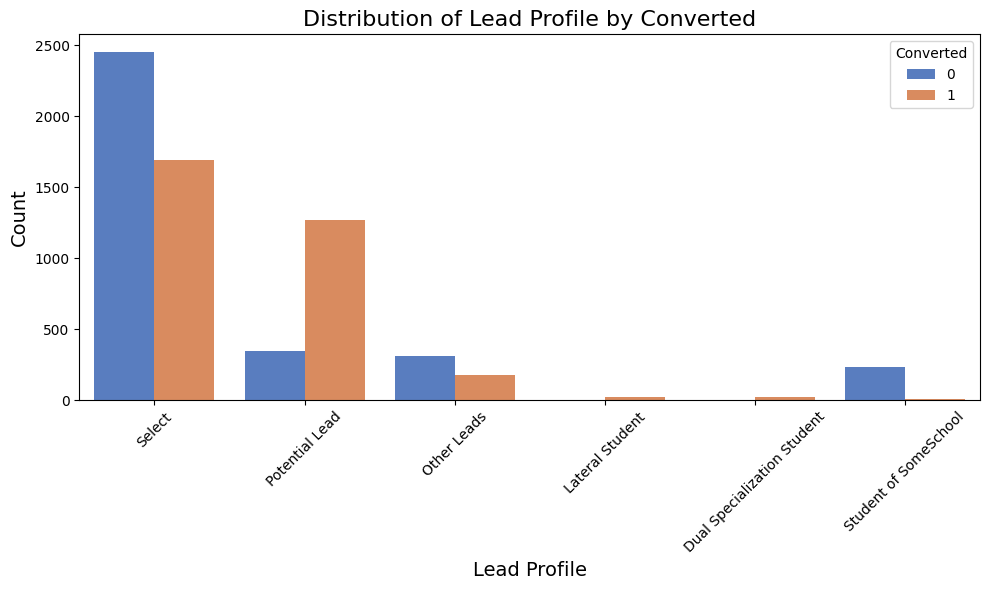

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Lead Profile,,,,,
Select,4146,63.48,1692,53.02,40.81
Potential Lead,1613,24.70,1267,39.71,78.55
Other Leads,487,7.46,180,5.64,36.96
Student of SomeSchool,241,3.69,9,0.28,3.73
Lateral Student,24,0.37,23,0.72,95.83
Dual Specialization Student,20,0.31,20,0.63,100.00


In [29]:
plot_print_distribution(data=data, feature='Lead Profile', target='Converted')

- Majority of the leads has not been assigned any values because of the `Select` value. This needs to be handled before building the model.
- The lead profiles which have been assigned a `Potential Lead` have the highest conversion rate. This suggests that leads that have been profiled in this way are more likely to convert.
- `Lateral Student` and `Dual Specialization Student` have low lead counts but high conversion rates, suggesting that these profiles are more likely to convert. Efforts should be made to engage with these leads at every opportunity.

##### City

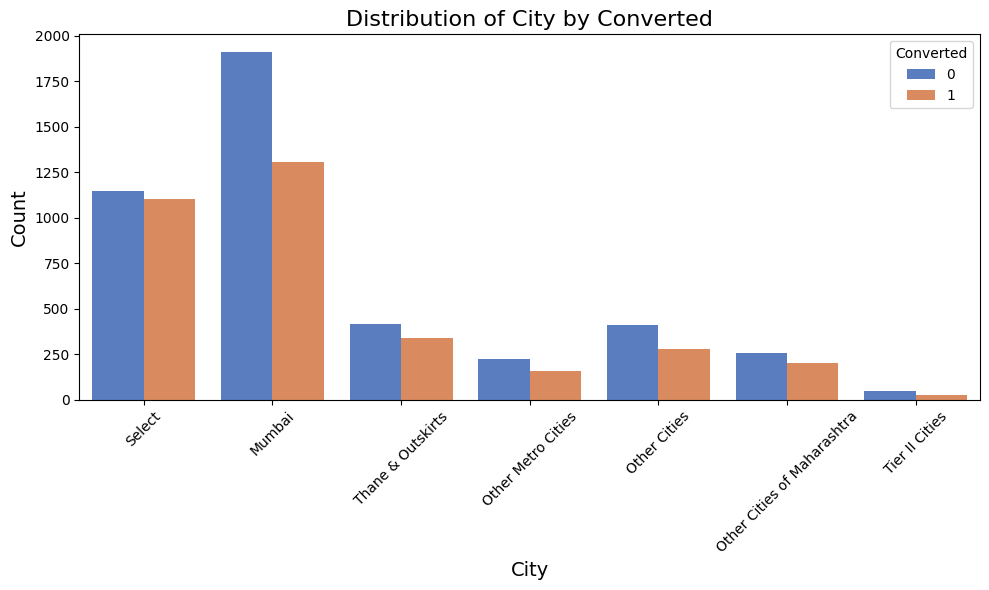

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
City,,,,,
Mumbai,3222,41.20,1309,38.42,40.63
Select,2249,28.76,1103,32.37,49.04
Thane & Outskirts,752,9.62,338,9.92,44.95
Other Cities,686,8.77,276,8.10,40.23
Other Cities of Maharashtra,457,5.84,201,5.90,43.98
Other Metro Cities,380,4.86,155,4.55,40.79
Tier II Cities,74,0.95,25,0.73,33.78


In [30]:
plot_print_distribution(data=data, feature='City', target='Converted')

The conversion rate is around same for all cities. The count of leads from `Mumbai` is highest. The high value of `Select` in the `City` column suggests that many leads selected not to give their city. This could be due to privacy concerns or a lack of interest in providing this information.

##### Asymmetrique Activity Index

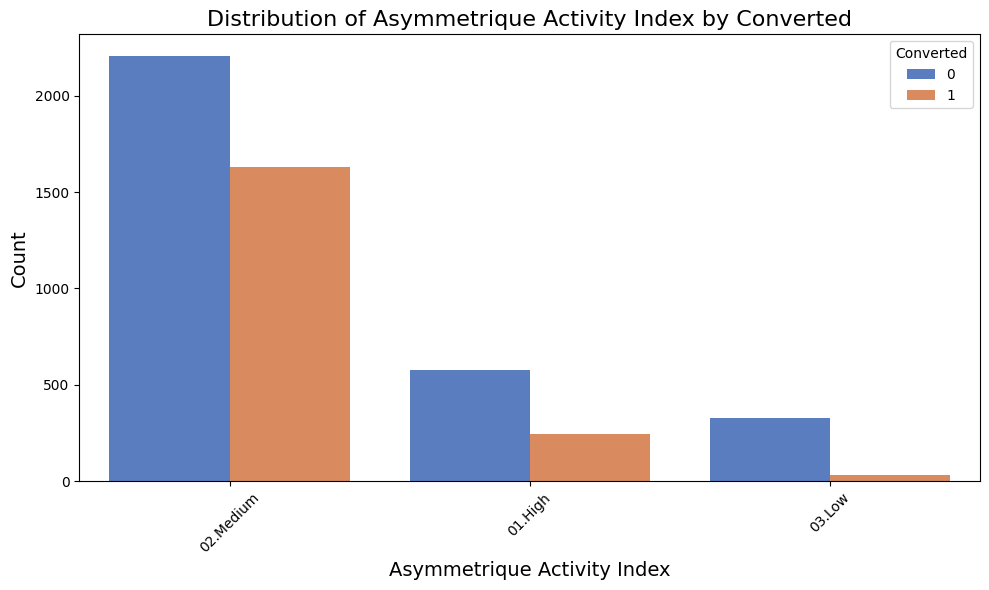

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Asymmetrique Activity Index,,,,,
02.Medium,3839,76.44,1630,85.43,42.46
01.High,821,16.35,245,12.84,29.84
03.Low,362,7.21,33,1.73,9.12


In [31]:
plot_print_distribution(data=data, feature='Asymmetrique Activity Index', target='Converted')

##### Asymmetrique Profile Index

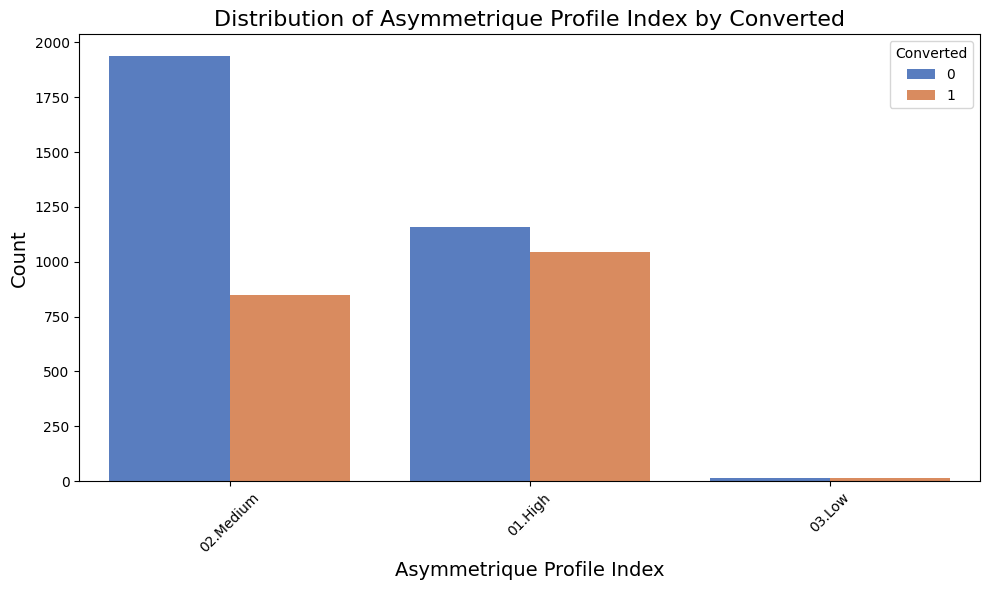

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Asymmetrique Profile Index,,,,,
02.Medium,2788,55.52,848,44.44,30.42
01.High,2203,43.87,1045,54.77,47.44
03.Low,31,0.62,15,0.79,48.39


In [32]:
plot_print_distribution(data=data, feature='Asymmetrique Profile Index', target='Converted')

##### Last Notable Activity

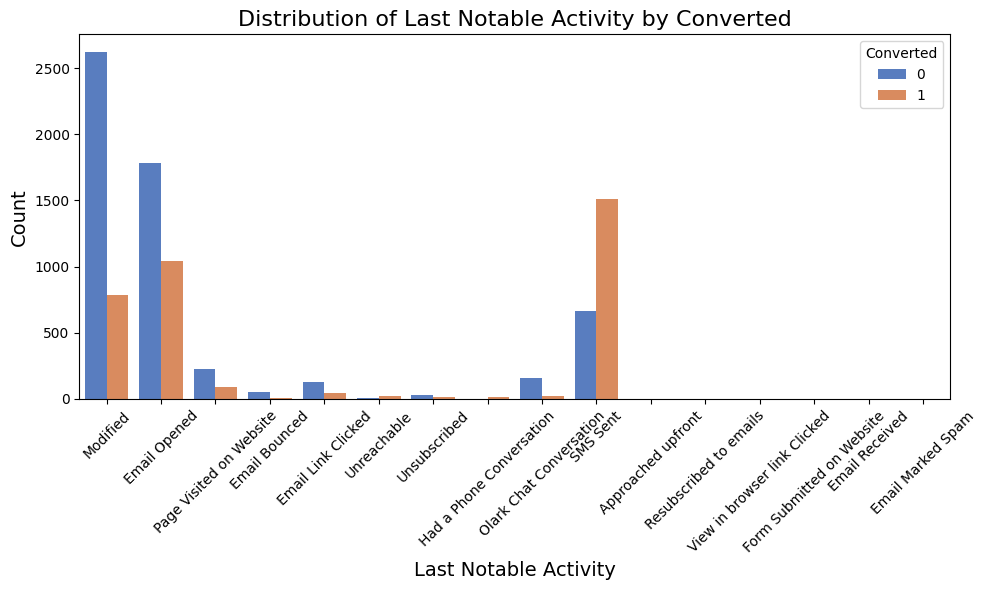

,Total Count,Total Percentage,Converted Count,Converted Percentage,Conversion Rate (%)
Last Notable Activity,,,,,
Modified,3407,36.87,783.0,21.99,22.98
Email Opened,2827,30.60,1044.0,29.32,36.93
SMS Sent,2172,23.51,1508.0,42.35,69.43
Page Visited on Website,318,3.44,93.0,2.61,29.25
Olark Chat Conversation,183,1.98,25.0,0.70,13.66
Email Link Clicked,173,1.87,45.0,1.26,26.01
Email Bounced,60,0.65,9.0,0.25,15.00


In [33]:
plot_print_distribution(data=data, feature='Last Notable Activity', target='Converted')

##### Features with **Select** value

In [34]:
columns_with_select = [col for col in data.columns if 'Select' in data[col].dropna().unique()]
columns_with_select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [35]:
for column in data[columns_with_select].columns:
    print(f"Select counts for {column}:")
    print(data[column].value_counts()['Select'])
    print("\n")

Select counts for Specialization:
1942


Select counts for How did you hear about X Education:
5043


Select counts for Lead Profile:
4146


Select counts for City:
2249




#### Numerical Features

In [36]:
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [37]:
data[numerical_features].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


##### TotalVisits

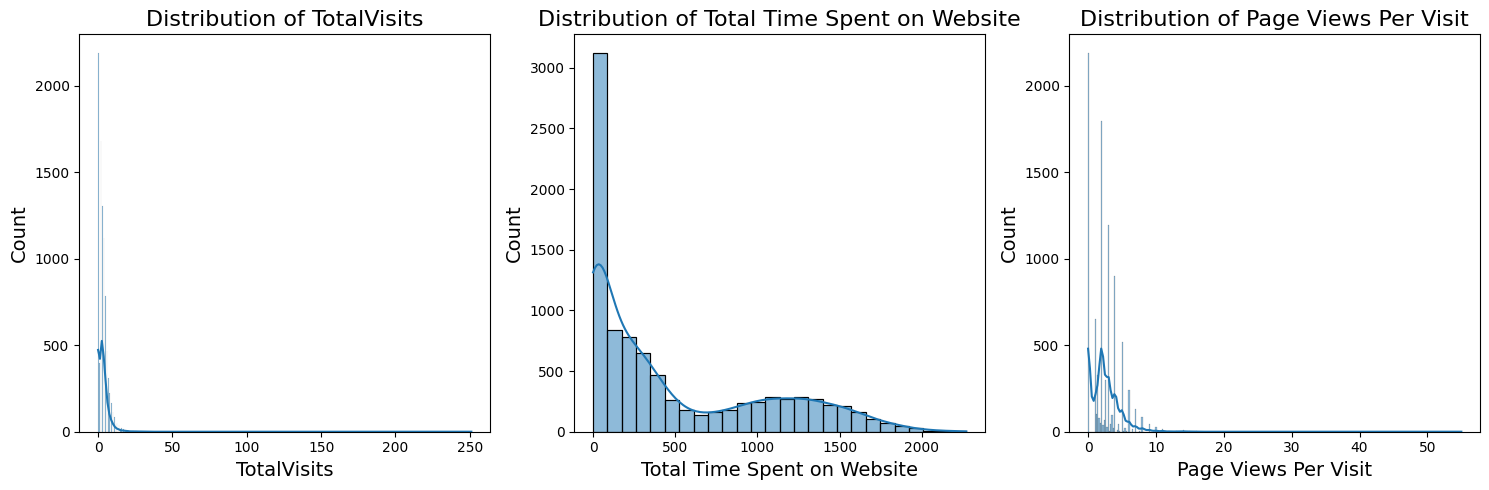

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, feature in zip(axes, numerical_features):
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}', fontsize=16)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.savefig('figures/numerical_features_distribution.png', dpi=300)
plt.show()

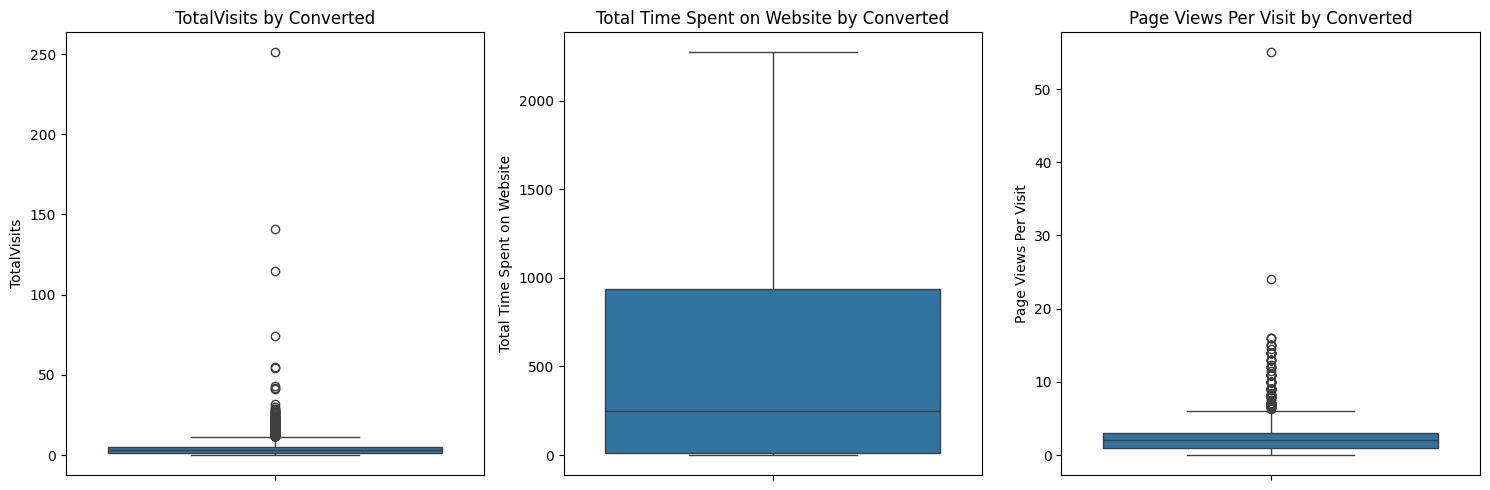

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the numerical features and axes
for ax, feature in zip(axes, numerical_features):
    sns.boxplot(y=data[feature], ax=ax)
    ax.set_title(f'{feature} by Converted')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.savefig('figures/numerical_features_boxplot.png', dpi=300)
plt.show()

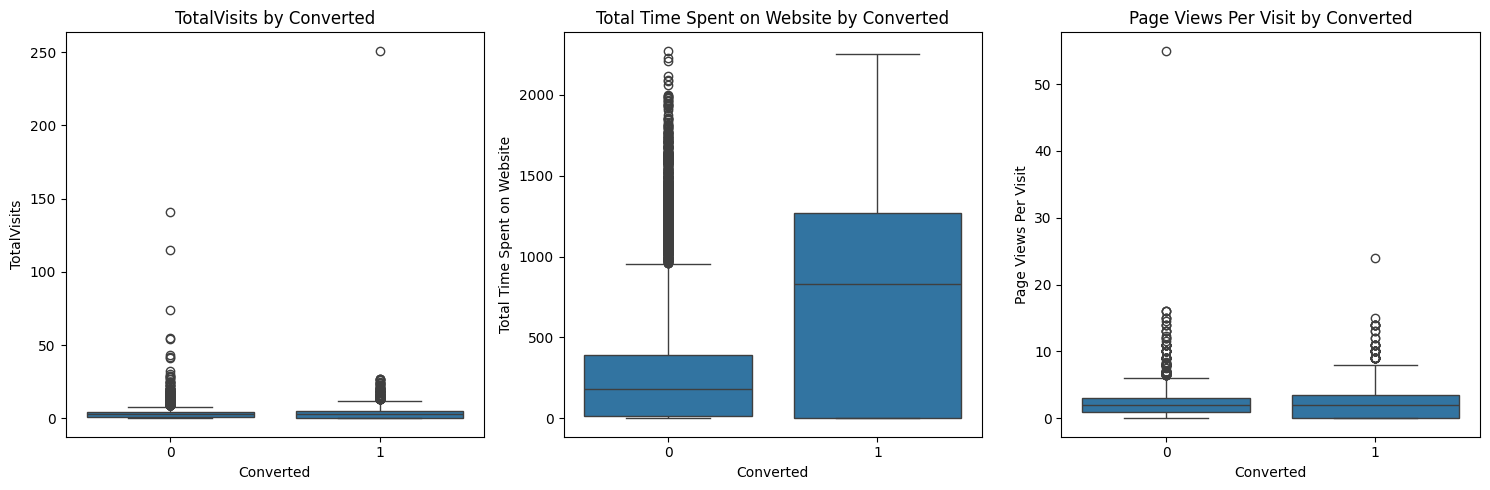

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the numerical features and axes
for ax, feature in zip(axes, numerical_features):
    sns.boxplot(x=data['Converted'], y=data[feature], ax=ax)
    ax.set_title(f'{feature} by Converted')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.savefig('figures/numerical_features_by_converted.png', dpi=300)
plt.show()


- The median of `Total Time Spend on Website` is higher for the converted leads compared to the non-converted leads. This suggests that leads who spend more time on the website are more likely to convert.
- The outliers in the `TotalVisits` and `Page Views Per Visit` are very high. We will have to handle them before building the model.

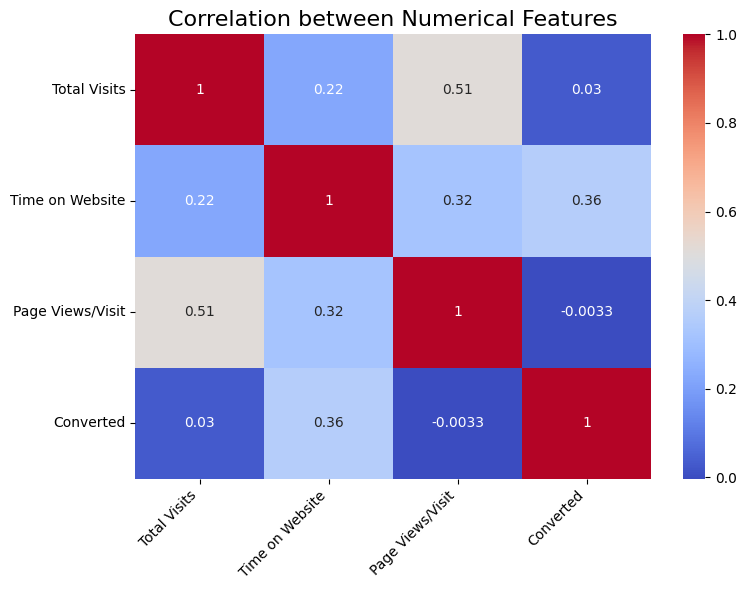

In [41]:
# Abbreviated feature names
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
shortened_features = ['Total Visits', 'Time on Website', 'Page Views/Visit', 'Converted']

# Create the heatmap with the adjusted settings
plt.figure(figsize=(8, 6))  # Increase figure size
sns.heatmap(data[numerical_features + ['Converted']].corr(), 
            annot=True, 
            cmap='coolwarm', 
            xticklabels=shortened_features, 
            yticklabels=shortened_features)

# Rotate the labels to make them more readable
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation between Numerical Features', fontsize=16)
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.savefig('figures/numerical_features_correlation.png', dpi=300)
plt.show()


- `Total Time Spent on Website` have a strong positive correlation with `Converted`. This suggests that leads who spend more time on the website are more likely to convert. The company should focus on engaging leads on the website and providing valuable content to increase the time spent on the website.
- `TotalVisits` and `Page Views Per Visit` do not show a strong correlation with `Converted`. This suggests that the number of visits and pages viewed per visit may not be as important in determining whether a lead will convert. The company should focus on other factors that have a stronger impact on conversion.

##### Outliers analysis for Numerical Features

In [42]:
# Function to calculate the number of outliers based on IQR method
def count_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers.shape[0]

# List of numerical features
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Counting outliers for each feature
outliers_count = {feature: count_outliers(data, feature) for feature in numerical_features}
outliers_count

{'TotalVisits': 267,
 'Total Time Spent on Website': 0,
 'Page Views Per Visit': 360}

There are no outliers in `Total Time Spent on Website`, which make sense as the more time a lead spends on the website, the more likely they are to convert. However, there are outliers in `TotalVisits` and `Page Views Per Visit`, which could be due to a variety of reasons such as bots, incorrect data, or actual leads who visited the website multiple times.
What we could do is to build the model with and without the outliers and see if there is any significant difference in the model performance.

### Missing Values

In [43]:
# Create a DataFrame for the missing values
missing_values = pd.DataFrame({
    'Total Missing Values': data.isnull().sum(),
    'Percentage': data.isnull().mean() * 100
})

# Filter the DataFrame to show only features with missing values
missing_values = missing_values[missing_values['Total Missing Values'] > 0]

# Sort the DataFrame by 'Total Missing Values' in descending order
missing_values = missing_values.sort_values(by='Total Missing Values', ascending=False)

# Display the result
missing_values


,Total Missing Values,Percentage
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Tags,3353,36.287879
What matters most to you in choosing a course,2709,29.318182
Lead Profile,2709,29.318182
What is your current occupation,2690,29.112554
Country,2461,26.634199


- We can drop the columns with more than 45% missing values as they will not be useful for our analysis.
- Similarly, we can drop the rows with les than 2% missing values as they will not have any significant impact on our analysis.
- For the rest of the columns, we can impute the missing values with the mode of the respective columns.

#### Select as a missing value

In problem statement, it is mentioned that many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. We will have to handle this before building the model. 
So we will check what's state of missing values in the dataset is if we replace 'Select' with NaN.

In [44]:
columns_with_select = [col for col in data.columns if 'Select' in data[col].dropna().unique()]
columns_with_select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [48]:
for column in data[columns_with_select].columns:
    print(f"Select counts for {column}:{data[column].value_counts()['Select']}")

Select counts for Specialization:1942
Select counts for How did you hear about X Education:5043
Select counts for Lead Profile:4146
Select counts for City:2249


In [49]:
# Replace 'Select' values with NaN
data.replace('Select', np.nan, inplace=True)

In [50]:
# Create a DataFrame for the missing values
missing_values = pd.DataFrame({
    'Total Missing Values': data.isnull().sum(),
    'Percentage': data.isnull().mean() * 100
})

# Filter the DataFrame to show only features with missing values
missing_values = missing_values[missing_values['Total Missing Values'] > 0]

# Sort the DataFrame by 'Total Missing Values' in descending order
missing_values = missing_values.sort_values(by='Total Missing Values', ascending=False)

# Display the result
missing_values

,Total Missing Values,Percentage
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Activity Index,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879


## Conclusion

This concludes the data exploration part of the case study. We have explored the features of the dataset and gained insights into the factors that differentiate the converted leads from the non-converted leads. These insights can be used to refine the lead generation and nurturing strategies to improve the conversion rate. 

We have not processed the data and our main focus was to understand the features of the dataset. In the next part, we will process the data and build a logistic regression model to assign a lead score to each of the leads.